# *Art from code* - companion Matplotlib notebooks 

This is a companion notebook to [Danielle Navarro's R tutorial "Art from Code"](https://art-from-code.netlify.app/), which took place during RConf2022. 

Python code by [Teresa Kubacka](http://teresa-kubacka.com/)

## Session 1: Get Started, part 2

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline

In [16]:
rng = np.random.default_rng(seed=1)

N = 50

df = pd.DataFrame(
    {
        'x0': rng.uniform(size=N), 
        'y0': rng.uniform(size=N), 
        'shade': rng.uniform(size=N), 
        'size': rng.uniform(size=N), 
    })

df['x1'] = df['x0'] + rng.uniform(low=-0.2, high=0.2, size=N)
df['y1'] = df['y0'] + rng.uniform(low=-0.2, high=0.2, size=N)

In [23]:
def series_to_radians(input_series): 
    s_min = input_series.min()
    s_max = input_series.max()
    out = (input_series - s_min) / (s_max-s_min) * 2*np.pi
    return out 

I want a collection of lines with start at (x0,y0) and end at (x1,y1)

In [44]:
for col in ['x0', 'x1']:
    df[col+'_theta'] = series_to_radians(df[col])

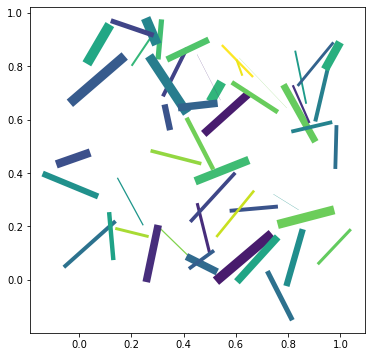

In [47]:
f, ax = plt.subplots(figsize=(6,6),  
                    )

cmap = mpl.cm.viridis

for row in df.iterrows():
#     print(row[1])
    df_tmp = row[1]
    ax.plot(
        [df_tmp['x0'], df_tmp['x1']], 
        [df_tmp['y0'], df_tmp['y1']], 
        color = cmap(df_tmp['shade']), 
        lw = df_tmp['size']*10
    )
    


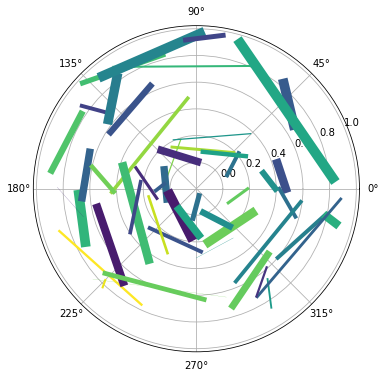

In [46]:
f, ax = plt.subplots(figsize=(6,6),  
                     subplot_kw={'projection': 'polar'}
                    )

cmap = mpl.cm.viridis

for row in df.iterrows():
#     print(row[1])
    df_tmp = row[1]
    ax.plot(
        [df_tmp['x0_theta'], df_tmp['x1_theta']], 
        [df_tmp['y0'], df_tmp['y1']], 
        color = cmap(df_tmp['shade']), 
        lw = df_tmp['size']*10
    )


The lines are straight :( 

Let's interpolate and make a multi-segmented line. First in linear coordinates, and let's plot some markers so that we can see what is happening

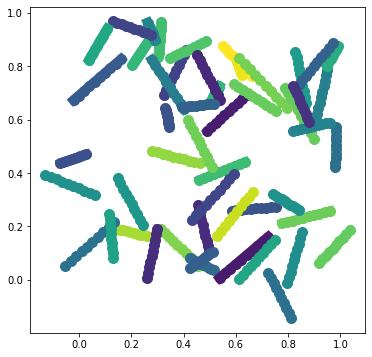

In [52]:
f, ax = plt.subplots(figsize=(6,6),  
                    )

cmap = mpl.cm.viridis
num_points = 10

for row in df.iterrows():
#     print(row[1])
    df_tmp = row[1]
    ax.plot(
        np.linspace(df_tmp['x0'], df_tmp['x1'], num=num_points), 
        np.linspace(df_tmp['y0'], df_tmp['y1'], num=num_points), 
        color = cmap(df_tmp['shade']), 
        lw = df_tmp['size']*10, 
        marker='o', markersize=10
    )
    


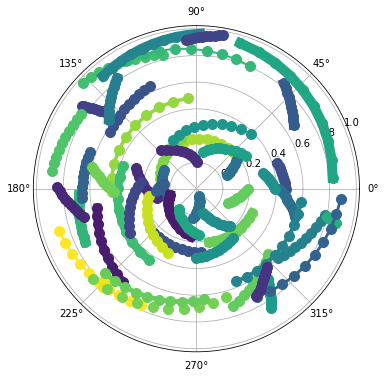

In [53]:
f, ax = plt.subplots(figsize=(6,6),  
                     subplot_kw={'projection': 'polar'}
                    )

cmap = mpl.cm.viridis
num_points = 10

for row in df.iterrows():
#     print(row[1])
    df_tmp = row[1]
    ax.plot(
        np.linspace(df_tmp['x0_theta'], df_tmp['x1_theta'], num=num_points), 
        np.linspace(df_tmp['y0'], df_tmp['y1'], num=num_points), 
        color = cmap(df_tmp['shade']), 
        lw = df_tmp['size']*10, 
        marker='o', markersize=10
    )
    


Bingo! Let's make it prettier

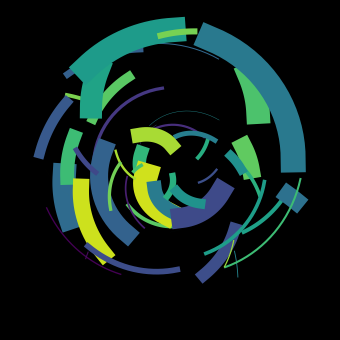

In [71]:
f, ax = plt.subplots(figsize=(6,6),  
                     subplot_kw={'projection': 'polar'}
                    )

cmap = mpl.cm.viridis_r
num_points = 20

for row in df.iterrows():
    df_tmp = row[1]
    ax.plot(
        np.linspace(df_tmp['x0_theta'], df_tmp['x1_theta'], num=num_points), 
        np.linspace(df_tmp['y0'], df_tmp['y1'], num=num_points), 
        color = cmap(df_tmp['shade']), 
        lw = (df_tmp['size']*5)**2, 
    )
    
# ax.set_rmin(df['y0'].min()/1.2)
ax.set_rmax(df['y0'].max()*1.2)
# ax.set_theta_direction(-1) # go clockwise 
# ax.set_theta_zero_location('N') # start with 0deg pointing to the 'north'    
    
ax.axis('off')  # get rid of the axes 
f.patch.set_facecolor('black') # create black bg 

## make it a function:

In [23]:
def series_to_radians(input_series): 
    s_min = input_series.min()
    s_max = input_series.max()
    out = (input_series - s_min) / (s_max-s_min) * 2*np.pi
    return out 

In [73]:
def generate_data(seed=1, N=50, frac=0.2, with_theta=True):

    rng = np.random.default_rng(seed=seed)

    df = pd.DataFrame(
        {
            'x0': rng.uniform(size=N), 
            'y0': rng.uniform(size=N), 
            'shade': rng.uniform(size=N), 
            'size': rng.uniform(size=N), 
        })

    df['x1'] = df['x0'] + rng.uniform(low=-frac, high=frac, size=N)
    df['y1'] = df['y0'] + rng.uniform(low=-frac, high=frac, size=N)
    
    if with_theta: 
        for col in df.columns:
            df[col+'_theta'] = series_to_radians(df[col])
            
    return df

In [100]:
def polar_art(df, cmap, figsize=(6,6), num_points=20, width_scale_fun = lambda x: (x*5)**2, 
             facecolor='black'):

    f, ax = plt.subplots(figsize=figsize,  
                         subplot_kw={'projection': 'polar'}
                        )

    for row in df.iterrows():
        df_tmp = row[1]
        ax.plot(
            np.linspace(df_tmp['x0_theta'], df_tmp['x1_theta'], num=num_points), 
            np.linspace(df_tmp['y0'], df_tmp['y1'], num=num_points), 
            color = cmap(df_tmp['shade']), 
            lw = width_scale_fun(df_tmp['size']), 
        )

    ax.set_rmax(df['y0'].max()*1.2)
    ax.axis('off')  
    f.patch.set_facecolor(facecolor) 
    
    return f, ax

(<Figure size 432x432 with 1 Axes>, <PolarAxesSubplot:>)

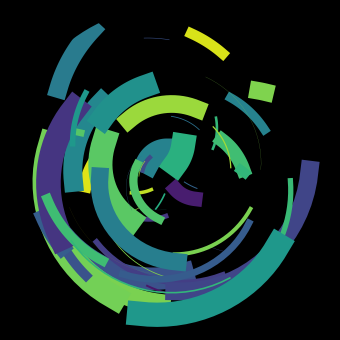

In [106]:
polar_art(generate_data(seed=None), mpl.cm.viridis_r)

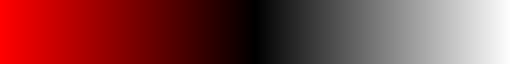

In [107]:
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list(name="my_cmap", colors=["red", "black", "white"])

custom_cmap

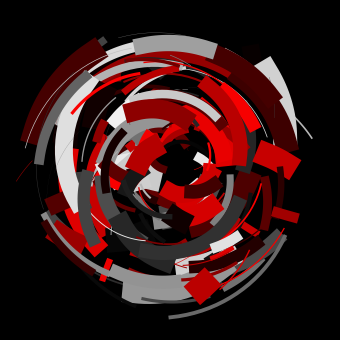

In [113]:
f, ax = polar_art(generate_data(seed=None, N=180), custom_cmap)
f.savefig('polar_fun.png', dpi=300, bbox_inches='tight')

This is fun! 